<a href="https://colab.research.google.com/github/faultlady/CNN_BasicImplementation/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of CNN to classification of car bike among 100 random images using Alexnet**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
PATH_OF_DATA= '/content/gdrive/"My Drive"/carbike/pred'
!ls {PATH_OF_DATA}

bike.35.jpg  bike.43.jpg   car.35.jpg  car.43.jpg   random.21.jpg
bike.36.jpg  bike.44.jpg   car.36.jpg  car.44.jpg   random.22.jpg
bike.37.jpg  bike.45.jpeg  car.37.jpg  car.45.jpg   random.23.jpg
bike.38.jpg  bike.46.jpg   car.38.jpg  car.46.jpg   random.24.jpg
bike.39.jpg  bike.47.jpeg  car.39.jpg  car.47.jpg   random.25.jpg
bike.40.jpg  bike.48.jpeg  car.40.jpg  car.48.jpg
bike.41.jpg  bike.49.jpg   car.41.jpg  car.49.jpg
bike.42.jpg  bike.50.jpg   car.42.jpg  car.50.jpeg


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
#bike: class 1
#car: class 2
#random: class 3

In [ ]:
path = '/content/gdrive/My Drive/carbike/train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 75 images belonging to 3 classes.


In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 3)
Image Size of first image :  (227, 227, 3)
Output of first image :  (3,)


In [ ]:
def AlexNet(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    X = Flatten()(X)
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    X = Dense(3,activation='softmax',name = 'fc2')(X)
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
alex = AlexNet(train[0][0].shape[1:])

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
train

In [ ]:
alex.fit_generator(train,epochs=100)

Epoch 1/100
3/3 [==============================] - 14s 5s/step - loss: 70.5222 - accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 14s 5s/step - loss: 8.0664 - accuracy: 0.4667
Epoch 3/100
3/3 [==============================] - 11s 4s/step - loss: 2.8737 - accuracy: 0.4267
Epoch 4/100
3/3 [==============================] - 8s 3s/step - loss: 1.6239 - accuracy: 0.5333
Epoch 5/100
3/3 [==============================] - 10s 3s/step - loss: 1.0524 - accuracy: 0.5867
Epoch 6/100
3/3 [==============================] - 9s 3s/step - loss: 0.8124 - accuracy: 0.7067
Epoch 7/100
3/3 [==============================] - 8s 3s/step - loss: 0.7766 - accuracy: 0.6667
Epoch 8/100
3/3 [==============================] - 10s 3s/step - loss: 0.6067 - accuracy: 0.6933
Epoch 9/100
3/3 [==============================] - 8s 3s/step - loss: 0.5906 - accuracy: 0.7467
Epoch 10/100
3/3 [==============================] - 12s 4s/step - loss: 0.5010 - accuracy: 0.7600
Epoch 11/100
3/3 [==============

In [ ]:
path_test = '/content/gdrive/My Drive/carbike/test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 15 images belonging to 3 classes.


In [ ]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Loss = 3.477428913116455
Test Accuracy = 0.800000011920929


**We get 80% accuracy in classifying the test data **

In [ ]:
path_test ='/content/gdrive/My Drive/carbike/pred/'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 38 images belonging to 1 classes.


In [ ]:
predictions = alex.predict_generator(predict)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
print(predictions[1])

[8.6814623e-07 7.6548213e-01 2.3451695e-01]


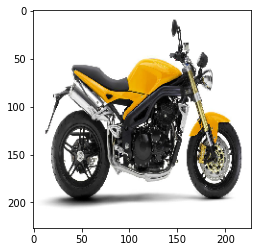

In [ ]:
imshow(predict[1][0][0])